In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from estimation import MonteCarloEstimators

In [21]:
NR_EXP_RUNS = 1000
NR_REPET = np.array([10 ** i for i in range(2, 7)])

n = 1 # or 10

np.random.seed(2023)

In [3]:
def provide_estimators(nr_rep):
    print("\n"+str(nr_rep))
    MC = MonteCarloEstimators(n_rep=nr_rep, n_timestamps=n)
    cmc = MC.CrudeMonteCarlo()
    amc = MC.AnthiteticMonteCarlo()
    psmc = MC.StratifiedMonteCarlo()
    osmc = MC.StratifiedMonteCarlo(update=False)
    cvmc = MC.ControlVariateMonteCarlo()
    return {"CrudeMC": cmc, "AntiMC": amc, "Prop_Strat_MC": psmc, "Opt_strat_MC": osmc, "ControlVarMC": cvmc, 'n_rep': nr_rep}

In [4]:
results = pd.DataFrame([provide_estimators(nr_rep = nr_rep) for nr_rep in NR_REPET for _ in range(NR_EXP_RUNS)])


100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100

100


In [5]:
results.to_csv('results.csv')

In [22]:
results = pd.read_csv('results.csv')

In [23]:
X = results.drop('Unnamed: 0', axis=1).melt('n_rep')
X['value']  = X['value'] * np.exp(-0.05)
X

,n_rep,variable,value
0,100,CrudeMC,12.885324
1,100,CrudeMC,14.128233
2,100,CrudeMC,13.594535
3,100,CrudeMC,10.226863
4,100,CrudeMC,10.561783
...,...,...,...
24995,1000000,ControlVarMC,12.356606
24996,1000000,ControlVarMC,12.351263
24997,1000000,ControlVarMC,12.315354
24998,1000000,ControlVarMC,12.347344


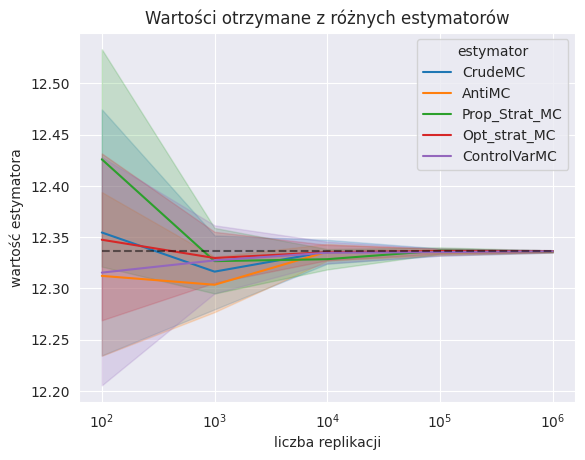

In [24]:
sns.lineplot(X, x='n_rep', y='value', hue='variable')
plt.xlabel('liczba replikacji')
plt.ylabel('wartość estymatora')
plt.legend(title='estymator')
plt.title('Wartości otrzymane z różnych estymatorów')
if n == 1:
    plt.hlines(y=MonteCarloEstimators(n_rep=0).BlackSchols(), xmin=X['n_rep'].min(), xmax=X['n_rep'].max(), linestyle="--", color="black", alpha=0.5)
plt.xscale('log')
plt.savefig('general_res.png')
plt.show()

In [ ]:
sns.lineplot(X.groupby(['n_rep', 'variable']).std().reset_index(), x='n_rep', y='value', hue='variable')
plt.xlabel('liczba replikacji')
plt.ylabel('odchylenie standardowe')
plt.legend(title='estymator')
plt.title('Odchylenia  otrzymane z różnych estymatorów')
plt.xscale('log')
plt.yscale('log')
plt.savefig('std_res.png')
plt.show()

In [ ]:
MC = MonteCarloEstimators(n_rep=0)

In [ ]:
print(
    X.groupby(['n_rep', 'variable']).mean().reset_index().pivot('n_rep', 'variable', 'value').round(3).to_latex(
        index=True, caption="Średnie wartości estymatorów."))

if n == 1:
    Y = X.copy()
    Y['value'] = np.abs(Y['value'] -  MC.BlackSchols())
    print(
        ((Y.groupby(['n_rep', 'variable'])).mean().reset_index().pivot('n_rep', 'variable', 'value').round(3)).to_latex(
            index=True, caption="Średnie obciążenie estymatorów."))

print(
    X.groupby(['n_rep', 'variable']).std().reset_index().pivot('n_rep', 'variable', 'value').round(3).to_latex(
        index=True, caption='Odchylenie standardowe estymatorów.'))